## Movie Recommender

In [ ]:
# Import essential packages
import pandas as pd
import numpy as np

# Import utilities
import os

# Import vizualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Import Data

train=pd.read_csv('train.csv')
imdb=pd.read_csv('imdb_data.csv')
movies=pd.read_csv('movies.csv')
tags=pd.read_csv('tags.csv')
links=pd.read_csv('links.csv')



In [ ]:
# Check train csv shape

train.shape # 10000038 rows

(10000038, 4)

In [ ]:
# Check train csv head. dataset has four columns

train.head(5)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [ ]:
imdb=pd.read_csv('imdb_data.csv')
movies=pd.read_csv('movies.csv')
tags=pd.read_csv('tags.csv')
links=pd.read_csv('links.csv')
genome=pd.read_csv('genome_scores.csv')

In [ ]:
# Merge train and movies datasets on movieId

df=pd.merge(train,movies,how='left',on='movieId') # Lefft join in train to prevent data loss

In [ ]:
# Merge imdb_data on df

df=pd.merge(df,imdb,how='left',on='movieId')

In [ ]:
# Check df dataframe

df.head(5)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi,Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn...,Lowell Cunningham,88.0,"$140,000,000",lingerie|michael jackson character|shorthaired...
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime,Sandra Bullock|Regina King|Enrique Murciano|Wi...,Marc Lawrence,115.0,"$45,000,000",female protagonist|cleave gag|good woman|fbi
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller,Jeff Davis|Heather Langenkamp|Miko Hughes|Matt...,Wes Craven,112.0,"$8,000,000",freddy krueger|elm street|famous director as h...


In [ ]:
# Generate a movie_rating dataframe

movie_rating=df.groupby(['title'])['rating'].mean() # agg rating by mean
movie_rating=pd.DataFrame(movie_rating)
movie_rating

,rating
title,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000
"""Great Performances"" Cats (1998)",2.753731
#1 Cheerleader Camp (2010),1.900000
#Female Pleasure (2018),4.000000
#FollowMe (2019),2.400000
...,...
به نام پدر,3.250000
…And the Fifth Horseman Is Fear (1965),3.000000
チェブラーシカ (2010),2.000000


In [ ]:
# Generate column to sum number of ratings per title

movie_rating['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

From the ratings count it seen that The Shawshank Redemption is the most rated title and a number of titles such as Love on the Dole  are tied for the least rated title

In [ ]:
# Most rated titles

pd.DataFrame(df.groupby('title')['rating'].count().sort_values(ascending=False)).head()

,rating
title,
"Shawshank Redemption, The (1994)",32831
Forrest Gump (1994),32383
Pulp Fiction (1994),31697
"Silence of the Lambs, The (1991)",29444
"Matrix, The (1999)",29014


In [ ]:
pd.DataFrame(df.groupby('title')['rating'].count().sort_values(ascending=True)).head()

,rating
title,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",1
Love's Coming (2014),1
Love's Brother (2004),1
Love's Abiding Joy (2006),1
Love on the Dole (1941),1


The lowest rating given by a user is 0.5 and highest is 5

In [ ]:
# The minimum and maximum ratings given by the users

print('The minimum rating given is:',movie_rating['rating'].min())
print('The minimum rating given is:',movie_rating['rating'].max())

The minimum rating given is: 0.5
The minimum rating given is: 5.0


In [ ]:
# Function creates ranges for ratings
# To be used for visualisations

def rating_range(text):
  
  if int (text) < 1:
    return '0-1'
  elif int (text) <2:
    return'1-2'
  elif int (text) <3:
    return '2-3'
  elif int (text) <4:
    return '3-4'
  else:
    return '4-5'

In [ ]:
# Apply rating_range function to generate a range column

movie_rating['range']=movie_rating['rating'].apply(rating_range)

In [ ]:
movie_rating.head()

,rating,num of ratings,range
title,,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1,3-4
"""Great Performances"" Cats (1998)",2.753731,67,2-3
#1 Cheerleader Camp (2010),1.900000,5,1-2
#Female Pleasure (2018),4.000000,1,4-5
#FollowMe (2019),2.400000,5,2-3


A majority of the ratings made by users range between 2-4.There are spikes in the at 2 , 2.5 , 3 and 3.5. The most popular rating given by users is 3.

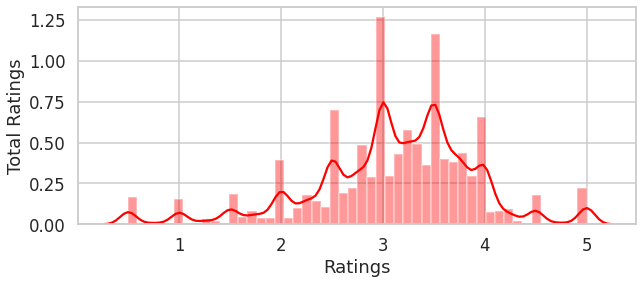

In [ ]:
# Plot distribution of ratings on scale 0-5

plt.figure(figsize=(10,4))
sns.set(style="whitegrid", context="talk")
sns.distplot(movie_rating['rating'],bins=50,kde=True,color='red')
plt.xlabel('Ratings') 
plt.ylabel('Total Ratings')   
plt.show()

From the scatter plot its clear that there is a proportional relationship between the number of ratings and popularity of a title

As the number of ratings which equates to user views increase, so does the ratings given by users. It reasons that popular movies that are viewed more will generally have good ratings

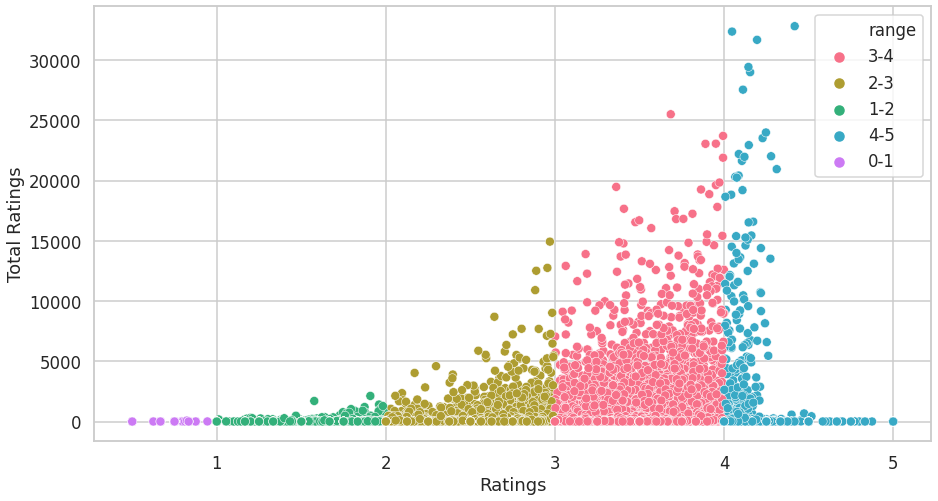

In [ ]:
# Plot scatter plot illustrating the relationship between ratings and number of ratings

sns.set(style="whitegrid", context="talk")
f, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x=movie_rating['rating'], y=movie_rating['num of ratings'],
hue=movie_rating['range'],palette="husl",sizes=(1, 8), linewidth=0.5,data=movie_rating, ax=ax) # range used to categorise ratings
plt.xlabel('Ratings') 
plt.ylabel('Total Ratings') 
plt.show()